In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [54]:

df = pd.read_csv("E:/Year Two/Semester 4/Ai/FraudDetection Project/FraudDetection/fraudTrain.csv")
test_df = pd.read_csv("E:/Year Two/Semester 4/Ai/FraudDetection Project/FraudDetection/fraudTest.csv")
df.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0
3,3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0
4,4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0


In [55]:
df.drop(columns=["ID", "merchant", "firstName", "lastName", "trans_num"], inplace=True)
test_df.drop(columns=["ID", "merchant", "firstName", "lastName", "trans_num"], inplace=True)
df

,Time,Card Number,category,Amount,is_fraud
0,1/1/2019 0:00,2.700000e+15,misc_net,4.97,0.0
1,1/1/2019 0:00,6.300000e+11,grocery_pos,107.23,0.0
2,1/1/2019 0:00,3.890000e+13,entertainment,220.11,0.0
3,1/1/2019 0:01,3.530000e+15,gas_transport,45.00,0.0
4,1/1/2019 0:03,3.760000e+14,misc_pos,41.96,0.0
...,...,...,...,...,...
1002099,2/15/2020 16:40,3.020000e+13,travel,2.87,0.0
1002100,2/15/2020 16:40,3.460000e+14,shopping_pos,9.09,0.0
1002101,2/15/2020 16:42,3.810000e+13,shopping_pos,10.00,0.0
1002102,2/15/2020 16:42,3.450000e+14,home,6.66,0.0


In [56]:
df.dropna(inplace=True)
df.isnull().sum()
test_df.dropna(inplace=True)
test_df.isnull().sum()

Time           0
Card Number    0
category       0
Amount         0
is_fraud       0
dtype: int64

In [57]:
unique_cagtegories = df['category'].nunique()
print(unique_cagtegories)


14


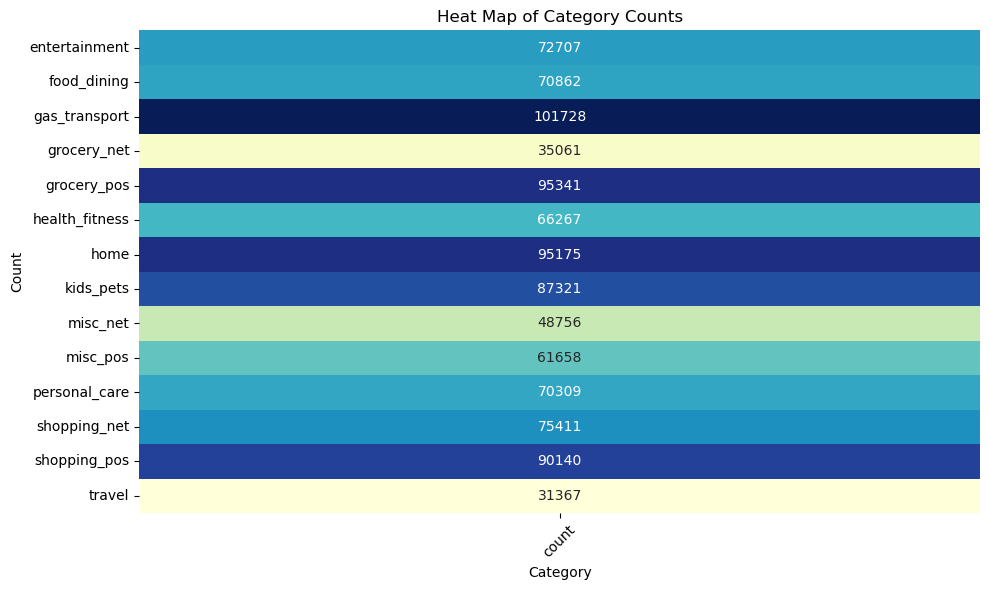

In [58]:
# Create a cross-tabulation of category counts
category_counts = pd.crosstab(index=df['category'], columns='count')

# Plot the heat map
plt.figure(figsize=(10, 6))
sns.heatmap(category_counts, cmap="YlGnBu", annot=True, fmt='d', cbar=False)
plt.title("Heat Map of Category Counts")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
label_encoder = LabelEncoder()
df["category_en"] = label_encoder.fit_transform(df['category'])
test_df["category_en"] = label_encoder.fit_transform(test_df['category'])
df.drop('category', axis=1, inplace=True)
test_df.drop('category', axis=1, inplace=True)

In [60]:
df['Time']=pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M')
df['Transaction_hour'] = df['Time'].dt.hour
df.head()


,Time,Card Number,Amount,is_fraud,category_en,Transaction_hour
0,2019-01-01 00:00:00,2.700000e+15,4.97,0.0,8,0
1,2019-01-01 00:00:00,6.300000e+11,107.23,0.0,4,0
2,2019-01-01 00:00:00,3.890000e+13,220.11,0.0,0,0
3,2019-01-01 00:01:00,3.530000e+15,45.00,0.0,2,0
4,2019-01-01 00:03:00,3.760000e+14,41.96,0.0,9,0


In [80]:
df.drop('Time', axis=1, inplace=True)
df.head()

KeyError: "['Time'] not found in axis"

In [78]:
test_df['Time']=pd.to_datetime(test_df['Time'], format='%m/%d/%Y %H:%M')
test_df['Transaction_hour'] = test_df['Time'].dt.hour
test_df.head()

,Time,Card Number,Amount,is_fraud,category_en,Transaction_hour
0,2020-06-21 12:14:00,2.291164e+15,2.86,0,10,12
1,2020-06-21 12:14:00,3.573030e+15,29.84,0,10,12
2,2020-06-21 12:14:00,3.598215e+15,41.28,0,5,12
3,2020-06-21 12:15:00,3.591920e+15,60.05,0,9,12
4,2020-06-21 12:15:00,3.526826e+15,3.19,0,13,12


In [79]:
test_df.drop('Time', axis=1, inplace = True)

In [64]:
#Spliting features and target variable
X_train = df.drop("is_fraud",axis=1)
y_train = df["is_fraud"]
X_test = test_df.drop("is_fraud",axis=1)
y_test = test_df["is_fraud"]

,Card Number,Amount,category_en,Transaction_hour
0,2.700000e+15,4.97,8,0
1,6.300000e+11,107.23,4,0
2,3.890000e+13,220.11,0,0
3,3.530000e+15,45.00,2,0
4,3.760000e+14,41.96,9,0
